In [1]:
from res_mgmt.envs.res_mgmt_env import ResMgmtEnv
env = ResMgmtEnv(
    num_resource_type=2,
    resource_size=3,
    time_size=5,
    num_job_slot=3,
    max_num_job=10**3,
)
obs = env.reset()
print(obs.shape)

action = env.action_space.sample()
print("Action:\n", action)
obs, reward, done, info = env.step(action)
print("Step:\n", obs, reward, done, info)

(41,)
Action:
 0
Step:
 [  3   3   3   3   3   3   3   3   3   3   2   1   1   0   0   2   2   2
   2   0   3   2   2   0   0   2   2   3   1   3   2   2   0   0   0   3
   3   2   0   0 997] -301.56666666666666 False {}


In [1]:
from stable_baselines3.common.env_checker import check_env
from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

env = ResMgmtEnv(
    num_resource_type=2,
    resource_size=3,
    time_size=5,
    num_job_slot=3,
    max_num_job=10**3,
)
check_env(env, warn=True)

D:\Programs\Miniconda3\envs\res-mgmt-rl-cuda-dev\lib\site-packages\torch\utils\tensorboard\__init__.py:4: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if not hasattr(tensorboard, '__version__') or LooseVersion(tensorboard.__version__) < LooseVersion('1.15'):


In [2]:
from stable_baselines3 import A2C
from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

env = ResMgmtEnv(
    num_resource_type=2,
    resource_size=3,
    time_size=5,
    num_job_slot=3,
    max_num_job=10**3,
)

model = A2C('MlpPolicy', env, verbose=1)
model.learn(total_timesteps=10)

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


In [ ]:
from stable_baselines3.common.evaluation import evaluate_policy

env = ResMgmtEnv(
    num_resource_type=2,
    resource_size=3,
    time_size=5,
    num_job_slot=3,
    max_num_job=10**3,
)
model = A2C('MlpPolicy', env, verbose=1)

evaluate_policy(model, env, n_eval_episodes=2)


In [2]:
from res_mgmt.envs.res_mgmt_env import ResMgmtEnv
import numpy as np

num_resource_type = 10
time_size = 5
resource_size = 10

env = ResMgmtEnv(
    num_resource_type=num_resource_type,
    time_size=time_size,
    resource_size=resource_size,
    num_job_slot=10,
    max_num_job=10**3,
)

observation = env.reset()
t = 0
while True:
    t += 1
    action = env.action_space.sample()
    observation, reward, done, info = env.step(action)
    print(t, action)
    env.my_render(f"render/{t}.png")
    if done or t > 50:
        print("Episode finished after {} timesteps".format(t+1))
        break
env.close()

1 5
2 6
3 2
4 7
5 6
6 4
7 0
8 9
9 9
10 9
11 2
12 6
13 1
14 2
15 5
16 2
17 6
18 3
19 0
20 0
21 8
22 3
23 2
24 2
25 8
26 7
27 5
28 4
29 9
30 10
31 4
32 3
33 9
34 7
35 5
36 0
37 8
38 5
39 6
40 3
41 1
42 0
43 3
44 3
45 10
46 4
47 8
48 2
49 10
50 1
51 10
Episode finished after 52 timesteps


(array([ 2013.,  6961., 20262., 40522., 57928., 58080., 40745., 20445.,
         7277.,  2073.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <BarContainer object of 10 artists>)

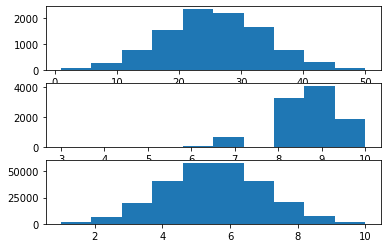

In [7]:
from res_mgmt.envs.generator import generate_jobs
import numpy as np
import matplotlib.pyplot as plt

jobs = generate_jobs(10, 50, 10)
jobs = jobs.reshape(10000, 50, 10)
def duration(image):
    return np.max(np.where(image == True), axis=1)[0] + 1
def max_req(image):
    return np.max(np.where(image == True), axis=1)[1] + 1
def reqs(image):
    t = np.where(image == True)
    if t[0].size == 0:
        return 0
    return np.max(np.where(image == True)) + 1
durstions = [duration(jobs[i]) for i in range(jobs.shape[0])]
max_reqs = [max_req(jobs[i]) for i in range(jobs.shape[0])]
fig, (ax0, ax1, ax2) = plt.subplots(3)
ax0.hist(durstions)
ax1.hist(max_reqs)
jobs = jobs.reshape(500000, 10)
reqss = [reqs(jobs[i]) for i in range(jobs.shape[0]) if reqs(jobs[i]) != 0]
ax2.hist(reqss)



In [10]:
import numpy as np
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

num_resource_type = 2
time_size = 5
resource_size = 3

env = ResMgmtEnv(
    num_resource_type=num_resource_type,
    time_size=time_size,
    resource_size=resource_size,
    num_job_slot=3,
    max_num_job=10**3,
)

# Parallel environments
# env = make_vec_env("CartPole-v1", n_envs=4)

model = A2C(
    "MlpPolicy",
    env,
    verbose=1,
    gamma=1,
    tensorboard_log="./a2c_res_mgmt_tensorboard/",
    device="cpu",
)
# model.learn(total_timesteps=25000)
model.learn(total_timesteps=1000)
model.save("a2c_res_mgmt")

del model  # remove to demonstrate saving and loading

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./a2c_res_mgmt_tensorboard/A2C_6
------------------------------------
| time/                 |          |
|    fps                | 256      |
|    iterations         | 100      |
|    time_elapsed       | 1        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.17    |
|    explained_variance | 1.22e-05 |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -518     |
|    value_loss         | 4.45e+05 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 269      |
|    iterations         | 200      |
|    time_elapsed       | 3        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.961   |
|    explained_variance | 8.94e-07 |
|    learni

In [11]:
import numpy as np
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env

from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

num_resource_type = 2
time_size = 5
resource_size = 3

env = ResMgmtEnv(
    num_resource_type=num_resource_type,
    time_size=time_size,
    resource_size=resource_size,
    num_job_slot=3,
    max_num_job=10**3,
)

# Parallel environments
# env = make_vec_env("CartPole-v1", n_envs=4)

model = A2C(
    "MlpPolicy",
    env,
    verbose=1,
    gamma=1,
    tensorboard_log="./a2c_res_mgmt_tensorboard/",
)
# model.learn(total_timesteps=25000)
model.learn(total_timesteps=1000)
model.save("a2c_res_mgmt")

del model  # remove to demonstrate saving and loading

Using cuda device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Logging to ./a2c_res_mgmt_tensorboard/A2C_7
------------------------------------
| time/                 |          |
|    fps                | 141      |
|    iterations         | 100      |
|    time_elapsed       | 3        |
|    total_timesteps    | 500      |
| train/                |          |
|    entropy_loss       | -1.25    |
|    explained_variance | 2.5e-06  |
|    learning_rate      | 0.0007   |
|    n_updates          | 99       |
|    policy_loss        | -711     |
|    value_loss         | 5.64e+05 |
------------------------------------
------------------------------------
| time/                 |          |
|    fps                | 145      |
|    iterations         | 200      |
|    time_elapsed       | 6        |
|    total_timesteps    | 1000     |
| train/                |          |
|    entropy_loss       | -0.942   |
|    explained_variance | 0        |
|    learn

In [4]:
from stable_baselines3 import A2C

model = A2C.load("a2c_res_mgmt")

obs = env.reset()
t = 0
max_iteration = 10 ** 5
while True:
    action, _states = model.predict(obs)
    obs, reward, done, info = env.step(action)
    if t % 1000 == 0:
        print(t, action, reward)
        env.my_render(f"render/{t}.png")
    if done or t > max_iteration:
        print("Episode finished after {} timesteps".format(t))
        break
    t += 1

# env.close()

0 5 0
1000 5 -191.91666666666666
2000 6 0
3000 5 0
4000 7 -49.150000000000006
5000 7 0
Episode finished after 5065 timesteps


In [ ]:
import numpy as np
from stable_baselines3 import A2C
from stable_baselines3.common.env_util import make_vec_env
from stable_baselines3.common.evaluation import evaluate_policy

from res_mgmt.envs.res_mgmt_env import ResMgmtEnv

num_resource_type = 2
time_size = 5
resource_size = 3

env = ResMgmtEnv(
    num_resource_type=num_resource_type,
    time_size=time_size,
    resource_size=resource_size,
    num_job_slot=3,
    max_num_job=10,
)

# Parallel environments
# env = make_vec_env("CartPole-v1", n_envs=4)

model = A2C(
    "MlpPolicy",
    env,
    verbose=1,
    gamma=1,
    tensorboard_log="./a2c_res_mgmt_tensorboard/",
)

# episode = 10
episode = 2

mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=episode, deterministic=True)
print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

# model.learn(total_timesteps=25000)
model.learn(total_timesteps=1000)


mean_reward, std_reward = evaluate_policy(model, env, n_eval_episodes=episode, deterministic=True)

print(f"mean_reward={mean_reward:.2f} +/- {std_reward}")

# env.close()

In [ ]:
import numpy as np
jobs = np.array(
    [[[[True,  True, False],
        [True, False,  True],
        [True, False,  True],
        [False, False,  True],
        [False,  True,  True]],

      [[False, False,  True],
        [True,  True,  True],
        [False,  True,  True],
        [False, False, False],
        [False,  True, False]]],


      [[[False, False,  True],
        [False,  True, False],
        [True,  True,  True],
        [False, False,  True],
        [False, False, False]],

      [[False, False,  True],
        [True, False, False],
        [True, False,  True],
        [True,  True, False],
        [True, False, False]]],


      [[[True, False, False],
        [False, False,  True],
        [True, False,  True],
        [True,  True, False],
        [False, False,  True]],

      [[True,  True,  True],
        [True, False,  True],
        [True,  True,  True],
        [False, False,  True],
        [False, False, False]]],


      [[[False, False,  True],
        [True,  True, False],
        [False,  True, False],
        [False,  True,  True],
        [True, False, False]],

      [[False,  True, False],
        [False,  True, False],
        [True,  True, False],
        [False, False, False],
        [True, False,  True]]],


      [[[True, False,  True],
        [False,  True,  True],
        [False,  True,  True],
        [True, False, False],
        [True, False,  True]],

      [[True,  True, False],
        [False,  True,  True],
        [False,  True,  True],
        [True, False,  True],
        [True,  True,  True]]]]
)
from res_mgmt.envs.res_mgmt_env import ResMgmtEnv